# Diferencias finitas

## Ejercicio 2

Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. Compara tu resultado con el que indica el
cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.
Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error
relativo a $f'(x_0)$:

$$\epsilon=\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)},$$
respecto a $h$.

In [1]:
function f(x)    #Función de la que se calculará su derivada numérica
    cos.(x)
end

f (generic function with 1 method)

In [2]:
function derivada_f(x)    #Función para definir la derivada exacta de la función coseno 
    -sin.(x)
end

derivada_f (generic function with 1 method)

In [3]:
derivada_f(0.5)           #Derivada exacta de la función coseno, en el punto 0.5

-0.479425538604203

In [4]:
function derivada_numérica(f,x,h)  #La función derivada_numerica recibirá la función a derivar, el punto donde se realizará la evaluación y el tamaño de h.
    fprima_=(f(x+h)-f(x))/h        #Para cada h, se calcula la derivada numérica
    return fprima_                 #Finalmente, la función derivada_numérica regresa el valor de la derivada numérica en el punto x.
end 

derivada_numérica (generic function with 1 method)

In [5]:
derivada_numérica(f,0.5,0.01)    #Derivada numérica de la función coseno, en el punto 0.5

-0.483805424462147

In [6]:
#Creamos una función para la derivada numérica que arroje una lista en lugar de un valor, para poder ir disminuyendo el valor de h y observar la convergencia al valor exacto de la derivada.

function derivada_numerica(f,x,a,b,n)  #La función derivada_numerica recibirá la función a derivar, el punto donde se realizará la evaluación, el valor de la h más grande (a), el valor de la h más pequeño (b) y el número de h's.
    lista=zeros(n)                     #Se crea una lista con n número de entradas, que tiene el mismo número de elementos que el intervalo H y en donde se guardarán los valores obtenidos con la derivada numérica para cada h.
    H=linspace(a,b,n)                  #Con el intervalo H, se va a ir disminuyendo el valor de h, para ver como la derivada numérica converge al valor exacto de la derivada, conforme h se va haciendo cada vez más pequeña
    for i in 1:n                       #Con este ciclo se va recoriendo el intervalo H
        fprima_=(f(x+H[i])-f(x))/H[i]  #Para cada h, se calcula la derivada numérica
        lista[i] = fprima_             #Se anexa el valor obtenido para la derivada numérica en lista.
    end   
 return lista                          #Finalmente, la función derivada_numerica regresa la lista
end 

derivada_numerica (generic function with 1 method)

In [7]:
list1 = derivada_numerica(f,0.5,1,0.001,1000);    #Guardando los valores obtenidos con la función derivada_numerica en list1

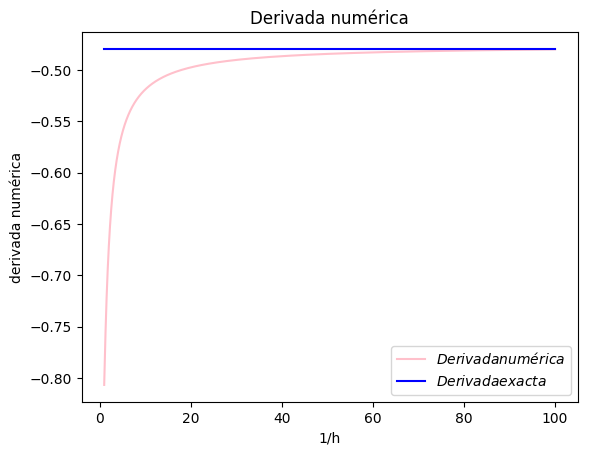

In [23]:
using PyPlot
H=linspace(1,0.01,1000)    #Intervalo H
1/H
xlabel("1/h")
ylabel("derivada numérica")
title("Derivada numérica")  
plot(1/H,list1, color = "pink", label = L"Derivadanumérica")   #Graficamos list1 contra 1/H
legend()
xexacta= fill(-0.479425538604203, 1000)    #Con esto graficamos la línea que indicará el valor de la derivada exacta, para ver que en efecto, el método converge a ese valor
plot(1/H,xexacta, color = "blue", label = L"Derivadaexacta")
legend()
show()

Como se observa en la gráfica, a medida que 1/h aumenta, la derivada numérica converge al valor de la derivada exacta (-0.479425538604203) en el punto específico 0.5.

In [9]:
function error(f,x,derivada_f,a,b,n)  #La función error recibirá la función a derivar, el punto donde se realizará la evaluación, la derivada exacta, el valor de la h más grande (a), el valor de la h más pequeño (b) y el número de h's.
    listae=zeros(n)                   #Se crea una lista con n número de entradas, que tiene el mismo número de elementos que el intervalo H y en donde se guardarán los valores obtenidos con la derivada numérica para cada h.
    H=linspace(a,b,n)                 #Con el intervalo H, se va a ir disminuyendo el valor de h, para ver como la derivada numérica converge al valor exacto de la derivada, conforme h se va haciendo cada vez más pequeña
    for i in 1:n                      #Con este ciclo se va recoriendo el intervalo H
        deltaf = f(x+H[i])-f(x)        
        err = abs((deltaf/H[i] - derivada_f(x))/(derivada_f(x)))       #Para cada h, se calcula el error relativo
        listae[i] = err               #Se anexa el valor obtenido para el error en lista.
    end
    return listae                     #Finalmente, la función error regresa la lista
end

error (generic function with 1 method)

In [10]:
listaerror = error(f,0.5,derivada_f,1,0.01,1000);   #Guardando los valores obtenidos con la función error en listaerror

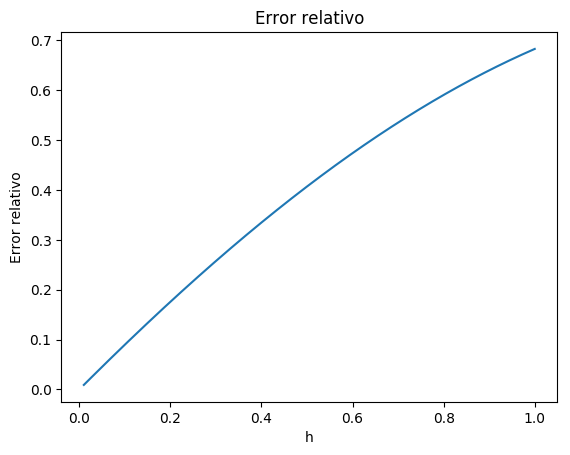

In [11]:
using PyPlot 
H=linspace(1,0.01,1000)                #Intervalo H
1/H
xlabel("h")
ylabel("Error relativo")
title("Error relativo")
plot(H,listaerror)                     #Graficamos listaerror contra H
show()

A partir de la gráfica de error relativo contra h, se observa que el error de la derivada numérica es de orden lineal.

## Ejercicio 3 
Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar el cálculo de la derivada numérica? Comenta.

El uso de más términos de la serie de Taylor de la función podría producir una mejor aproximación.

__Tip:__ ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series? 


La serie de Taylor de $f(x+h)$ alrededor de h=0, está dada por:

$$f(x+h)=f{\left (x \right )} + h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)
$$

Mientras que la serie de Taylor para $f(x-h)$ alrededor de h=0, está dada por:

$$
f(x-h)=f{\left (x \right )} - h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} - \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)
$$

Si restamos $f(x+h)-f(x-h)$, obtenemos:

$$f(x+h)-f(x-h)=2h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \frac{h^{3}}{3} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \mathcal{O}\left(h^{5}\right)$$

Considerando solo hasta el término de la derivada:

$$f(x+h)-f(x-h)=2h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \mathcal{O}\left(h^{3}\right)$$

Considerando que $\Delta f(x,h)=f(x+h)-f(x)$ y que $f'(x)=\left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}$, obtenemos:

$$\Delta f(x,h)=2h f'(x)+ \mathcal{O}\left(h^{3}\right)$$

Al despejar llegamos a:

$$
\frac{\Delta f(x,h)}{2h}-f'(x)=\mathcal{O}\left(h^{2}\right)
$$

## Ejercicio 4. Derivada simétrica
Implementa la _derivada
simétrica_ en `Julia` como `derivada_Simetrica` y repite la
comparativa que realizaste en el __ejercicio 2__.



La derivada simétrica está dada por:
$$f'(x)=\frac { f(x+h)-f(x-h) }{ 2h } $$

In [24]:
function derivada_numerica_simetrica(f,x,h)  #La función derivada_numerica_simetrica recibirá la función a derivar, el punto donde se realizará la evaluación y el tamaño de h.
    fprima_=(f(x+h)-f(x-h))/2h               #Se calcula la derivada numérica simétrica
    return fprima_                           #Finalmente, la función derivada_numérica_simétrica el valor obtenido
end 

derivada_numerica_simetrica (generic function with 1 method)

In [25]:
derivada_numerica_simetrica(f,0.5,0.01)      #Derivada numérica simétrica de la función coseno, en el punto 0.5

-0.4794175482185081

In [14]:
#Creamos una función para la derivada numérica que arroje una lista en lugar de un valor, para poder ir disminuyendo el valor de h y observar la convergencia al valor exacto de la derivada.
function derivada_numérica_simétrica(f,x,a,b,n)  #La función derivada_numérica_simétrica recibirá la función a derivar, el punto donde se realizará la evaluación, el valor de la h más grande (a), el valor de la h más pequeño (b) y el número de h's.
    lista=zeros(n)                     #Se crea una lista con n número de entradas, que tiene el mismo número de elementos que el intervalo H y en donde se guardarán los valores obtenidos con la derivada numérica para cada h.
    H=linspace(a,b,n)                  #Con el intervalo H, se va a ir disminuyendo el valor de h, para ver como la derivada numérica converge al valor exacto de la derivada, conforme h se va haciendo cada vez más pequeña
    for i in 1:n                       #Con este ciclo se va recoriendo el intervalo H
        fprima_=(f(x+H[i])-f(x-H[i]))/2H[i]  #Para cada h, se calcula la derivada numérica simétrica
        lista[i] = fprima_             #Se anexa el valor obtenido para la derivada numérica simétrica en lista.
    end   
 return lista                          #Finalmente, la función derivada_numérica_simétrica regresa la lista
end 

derivada_numérica_simétrica (generic function with 1 method)

In [15]:
list2 = derivada_numérica_simétrica(f,0.5,1,0.001,1000);    #Guardando los valores obtenidos con la función derivada_numérica_simétrica en list2

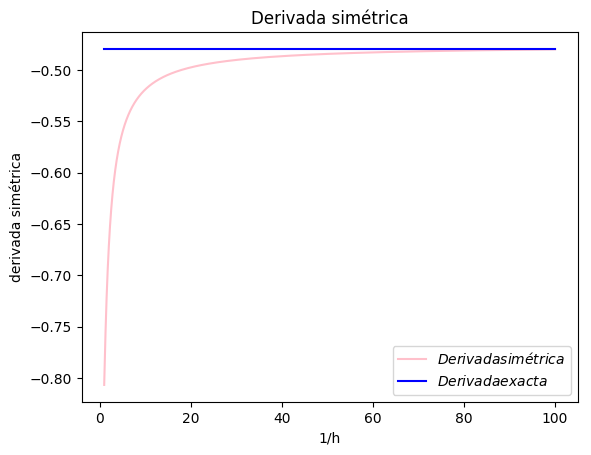

In [22]:
H=linspace(1,0.01,1000)   #Intervalo H
1/H
using PyPlot
xlabel("1/h")
ylabel("derivada simétrica")
title("Derivada simétrica")   
plot(1/H,list1, color = "pink", label = L"Derivadasimétrica") #Graficamos list2 contra 1/H
legend()
xexacta= fill(-0.479425538604203, 1000)      #Con esto graficamos la línea que indicará el valor de la derivada exacta, para ver que en efecto, el método converge a ese valor
plot(1/H,xexacta, color = "blue", label = L"Derivadaexacta")
legend()
show()

Como se observa en la gráfica, a medida que 1/h aumenta, la derivada numérica converge al valor de la derivada exacta (-0.479425538604203) en el punto específico 0.5.

In [17]:
function error2(f,x,derivada_f,a,b,n)  #La función error recibirá la función a derivar, el punto donde se realizará la evaluación, la derivada exacta, el valor de la h más grande (a), el valor de la h más pequeño (b) y el número de h's.
    listae2=zeros(n)                   #Se crea una lista con n número de entradas, que tiene el mismo número de elementos que el intervalo H y en donde se guardarán los valores obtenidos con la derivada numérica para cada h.
    H=linspace(a,b,n)                 #Con el intervalo H, se va a ir disminuyendo el valor de h, para ver como la derivada numérica converge al valor exacto de la derivada, conforme h se va haciendo cada vez más pequeña
    for i in 1:n                      #Con este ciclo se va recoriendo el intervalo H      
        err = abs((f(x+H[i])-f(x-H[i]))/2H[i]- derivada_f(x))      #Para cada h, se calcula el error relativo
        listae2[i] = err               #Se anexa el valor obtenido para el error en listae.
    end
    return listae2                     #Finalmente, la función error regresa la listae
end

error2 (generic function with 1 method)

In [18]:
listaerror2 = error2(f,0.5,derivada_f,1,0.01,1000);    #Guardando los valores obtenidos con la función error2 en listaerror2

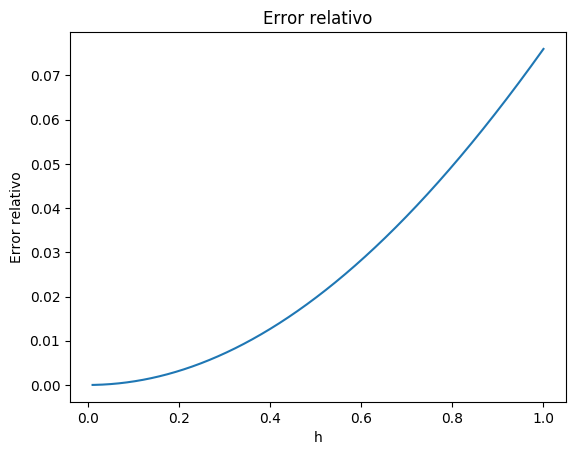

In [19]:
using PyPlot
H=linspace(1,0.01,1000)
1/H
xlabel("h")
ylabel("Error relativo")
title("Error relativo")
plot(H,listaerror2)       #Graficando listaerror2 contra H
show()

A partir de la gráfica de error relativo contra h, se observa que con la derivada simétrica, el error es de orden cuadrático, por lo que con este método, la convergencia es más rápida en comparación al método de derivación númerica mostrado arriba, en el que el error es de orden lineal.

## Ejercicio 5:
Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$



Para que ${ \Delta  }_{ h }$ sea un operador lineal, necesita cumplir con dos condiciones: aditiva y homogeneidad, es decir:

$${ \Delta  }_{ h }(\alpha f+g)={ \alpha \Delta  }_{ h }(f)+{ \Delta  }_{ h }(g)$$

con $\alpha $ un escalar y f y g dos funciones. Comenzamos por ver que:

$${ \Delta  }_{ h }(\alpha f+g)=\sum _{ i=1 }^{ \infty  }{ \frac { h^{ i } }{ i! }  } \frac { { d }^{ i }(\alpha f+g) }{ d{ x }^{ i } } $$

Utilizando el hecho de que la derivada es un operador lineal, tenemos:

$${ \Delta  }_{ h }(\alpha f+g)=\sum _{ i=1 }^{ \infty  }{ \frac { h^{ i } }{ i! }  } \left( \alpha \frac { { d }^{ i }f }{ d{ x }^{ i } } +\frac { { d }^{ i }g }{ d{ x }^{ i } }  \right)  $$

Aplicando la propiedad distributiva:

$${ \Delta  }_{ h }(\alpha f+g)=\sum _{ i=1 }^{ \infty  }{ \left( \alpha \frac { h^{ i } }{ i! } \frac { { d }^{ i }f }{ d{ x }^{ i } } +\frac { h^{ i } }{ i! } \frac { { d }^{ i }g }{ d{ x }^{ i } }  \right)  } $$

Utilizando el hecho de que la suma también es un operador lineal, obtenemos:

$${ \Delta  }_{ h }(\alpha f+g)=\alpha \sum _{ i=1 }^{ \infty  }{ \left( \frac { h^{ i } }{ i! } \frac { { d }^{ i }f }{ d{ x }^{ i } }  \right) +\sum _{ i=1 }^{ \infty  }{ \left( \frac { h^{ i } }{ i! } \frac { { d }^{ i }g }{ d{ x }^{ i } }  \right)  }  } $$

Por lo que finalmente llegamos a:

$${ \Delta  }_{ h }(\alpha f+g)=\alpha { \Delta  }_{ h }(f)+{ \Delta  }_{ h }(g)$$

## Ejercicio 6

Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.
    
* __Nota:__ En la clase se demostró que $\phi(x)=e^x-1$, escriba el razonamiento en $\LaTeX$ de como se llegó a esto.

Considerando:

$${ \Delta  }_{ h }f(x)=f(x+h)-f(x)$$

Utilizando series de Taylor obtenemos:

$$f(x+h)-f(x)=h{ f }'(x)+\frac { { h }^{ 2 } }{ 2 } { f }''(x)+\frac { { h }^{ 3 } }{ 6 } { f }'''(x)+...$$

Reagrupando:

$${ \Delta  }_{ h }f(x)=\left( h\frac { d }{ dx } +\frac { { h }^{ 2 } }{ 2 } \frac { { d }^{ 2 } }{ { dx }^{ 2 } } +\frac { { h }^{ 3 } }{ 6 } \frac { { d }^{ 3 } }{ { dx }^{ 3 } } +... \right) f(x)$$

De donde:

$${ \Delta  }_{ h }=\left( h\frac { d }{ dx } +\frac { { h }^{ 2 } }{ 2 } \frac { { d }^{ 2 } }{ { dx }^{ 2 } } +\frac { { h }^{ 3 } }{ 6 } \frac { { d }^{ 3 } }{ { dx }^{ 3 } } +... \right) =\sum _{ i=0 }^{ \infty  }{ \frac { { \left( h\frac { d }{ dx }  \right)  }^{ i } }{ i! } -1 }  $$

Recordadndo que:

$${ e }^{ y }=\sum _{ i=1 }^{ \infty  }{ \frac { { y }^{ i } }{ i! }  } =\sum _{ i=0 }^{ \infty  }{ \frac { { y }^{ i } }{ i! } -1 } $$

Por lo que:

$${ \Delta  }_{ h }={ e }^{ h\frac { d }{ dx }  }-1$$

como $\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$, obtenemos:

$$\phi(x)=e^x-1$$


